In [5]:
# install the required packages
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras import regularizers
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# loading and preparing the MNIST dataset
cifar10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

50000

image dimension is: (32, 32, 3)


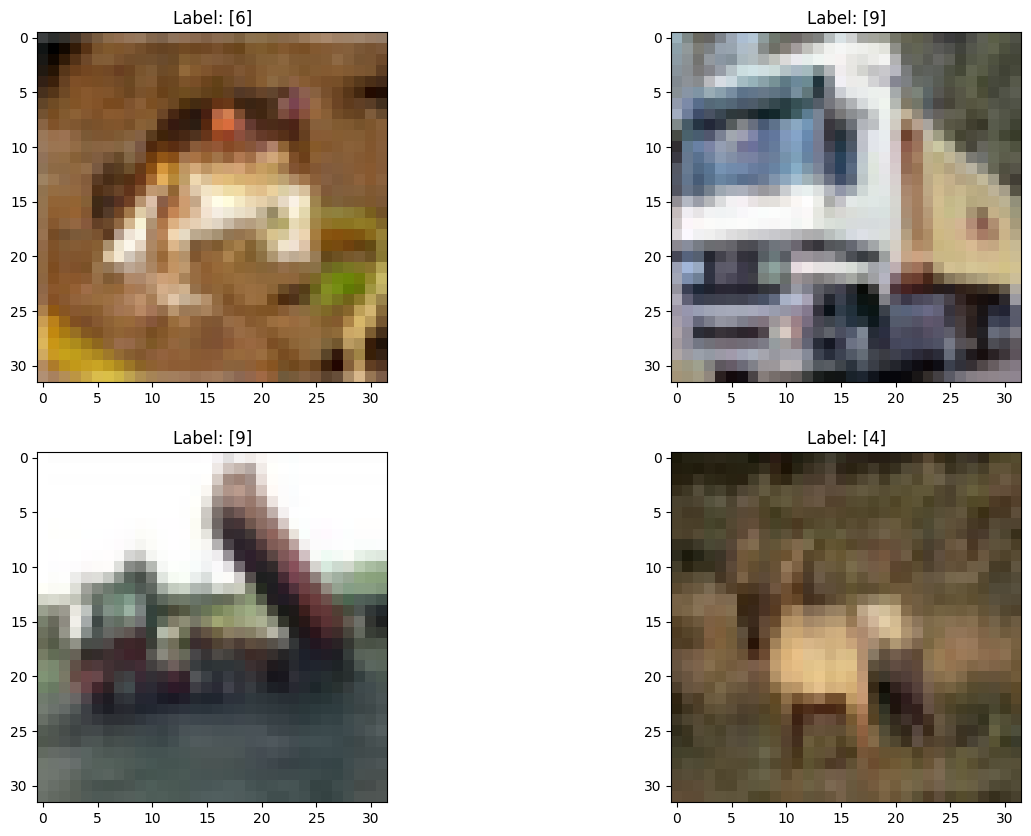

In [7]:
# visualize the data
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

img_list = train_images[0:4]
img_labels = train_labels[0:4]

for i in range(len(img_list)):
    ax = axes[i // 2, i % 2]
    ax.imshow(img_list[i],)
    ax.set_title(f"Label: {img_labels[i]}")

print(f"image dimension is: {img_list[0].shape}")

In [8]:
# Getting the number of unique classes in our dataset
class_num = len(np.unique(train_labels))
print(f"number of classes: {class_num}")

number of classes: 10


In [9]:
#scaling each pixel between 0.0 to 1.0
train_images = train_images / 255
test_images = test_images/ 255

In [10]:
# build the unweighted CNN model
cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3),
                  kernel_regularizer=regularizers.l2(1e-4)), # using convolution layer with L2 regulariztion
    layers.MaxPooling2D((2, 2)), # maxpooling to reduces the spatial dimensions
    layers.Conv2D(64, (3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(1e-4)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3), # dropout to fight overfitting
    layers.Conv2D(128, (3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(1e-3)),
    layers.Dropout(0.3),
    layers.Flatten(), # flatting the image to 1D array before the the fully conected layer
    layers.Dense(128, activation='relu',
                 kernel_regularizer=regularizers.l2(1e-4)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l2(1e-5)),
    layers.Dense(10, activation='softmax')  # adding softmax activation function for categorical classification
])
cnn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 364,426 (1.39 MB)

 Trainable params: 364,426 (1.39 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
cnn.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])
# Train the model
history = cnn.fit(train_images, train_labels, validation_split=0.20, epochs=120, batch_size = 128,
                verbose=1)
# since the dataset is relatively big we will implement batch_size of 128 and
# validation_split of 0.20

Epoch 1/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.2440 - loss: 2.0636 - val_accuracy: 0.4318 - val_loss: 1.5931
Epoch 2/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4568 - loss: 1.5329 - val_accuracy: 0.5502 - val_loss: 1.3311
Epoch 3/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5265 - loss: 1.3734 - val_accuracy: 0.5841 - val_loss: 1.2440
Epoch 4/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5744 - loss: 1.2725 - val_accuracy: 0.6256 - val_loss: 1.1450
Epoch 5/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5989 - loss: 1.2124 - val_accuracy: 0.6515 - val_loss: 1.0588
Epoch 6/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6241 - loss: 1.1476 - val_accuracy: 0.6488 - val_loss: 1.0667
Epoch 7/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6432 - loss: 1.0986 - val_accuracy: 0.6743 - val_loss: 1.0320
Epoch 8/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6569 - loss: 1.0676 - val_ac

In [12]:
# Evaluate the model
test_loss, test_acc = cnn.evaluate(test_images, test_labels, verbose=1)
print(f'\nTest accuracy: {test_acc}')



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7925 - loss: 0.8234

Test accuracy: 0.7914000153541565


In [14]:
def plot_evalution(history):
    history_dict = history.history
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    epochs = np.arange(1, len(acc) + 1)
    plt.style.use('seaborn-darkgrid')
    plt.figure(figsize=(14, 6))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'o-', label='Training Accuracy', color='blue', linewidth=2, markersize=5)
    plt.plot(epochs, val_acc, 's-', label='Validation Accuracy', color='green', linewidth=2, markersize=5)
    plt.title('Training and Validation Accuracy', fontsize=16, fontweight='bold')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend(loc='best')
    plt.grid(True)

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'o-', label='Training Loss', color='red', linewidth=2, markersize=5)
    plt.plot(epochs, val_loss, 's-', label='Validation Loss', color='orange', linewidth=2, markersize=5)
    plt.title('Training and Validation Loss', fontsize=16, fontweight='bold')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend(loc='best')
    plt.grid(True)

    # Adjust layout to avoid overlap
    plt.tight_layout()

    # Show the plots
    plt.show();

<ipython-input-14-789ab43c5285>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


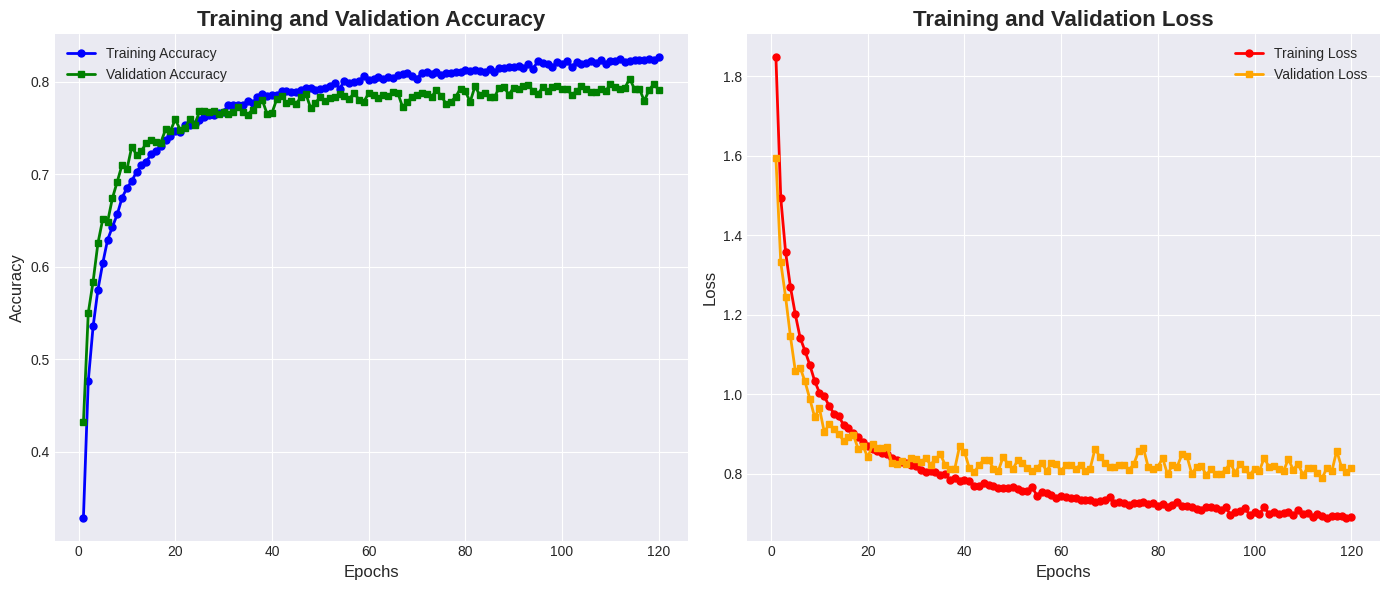

In [15]:
plot_evalution(history)